In [2]:
import numpy as np
import matplotlib.pyplot as plt
from simult import gaussSeidel
from scipy.optimize import fsolve

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 2.2 Método de Gauss-Seidel

### 2.2.1 Explicación del método

Considere un sistema de ecuaciones simultaneas con $n$-variables escritas como:

$$
\begin{matrix}
a_{11} x_1 + a_{12} x_2 + a_{13} x_3 + \cdots + a_{1n} x_n & = b_1 \\
a_{21} x_1 + a_{22} x_2 + a_{23} x_3 + \cdots + a_{2n} x_n & = b_2 \\
a_{31} x_1 + a_{32} x_2 + a_{33} x_3 + \cdots + a_{3n} x_n & = b_3 \\
\vdots & \vdots \\
a_{n1} x_1 + a_{n2} x_2 + a_{n3} x_3 + \cdots + a_{nn} x_n & = b_n \\
\end{matrix}
$$

- Sistema de ecuaciones lineales en forma matricial:
$$\begin{bmatrix}
a_{11} & a_{12} & a_{13} & \cdots & a_{1n} \\
a_{21} & a_{22} & a_{23} & \cdots & a_{2n} \\
a_{31} & a_{32} & a_{33} & \cdots & a_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & a_{n3} & \cdots & a_{nn}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_n
\end{bmatrix}
=
\begin{bmatrix}
b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_n
\end{bmatrix}$$

El sistema se puede resolver aplicando un método análogo a la iteración de punto fijo:

$$
\begin{matrix}
x_1 = & \frac{b_1 - \left(a_{12}x_2 + a_{13} x_3 + \cdots a_{1n} x_n\right)}{a_{11}} \\
x_2 = & \frac{b_2 - \left(a_{21}x_1 + a_{23} x_3 + \cdots a_{2n} x_n\right)}{a_{22}} \\
x_3 = & \frac{b_3 - \left(a_{31}x_1 + a_{32} x_2 + \cdots a_{2n} x_n\right)}{a_{33}} \\
\vdots & \vdots \\
x_n = & \frac{b_n - \left(a_{n1}x_1 + a_{n2} x_2 + \cdots a_{n,n-1} x_{n-1}\right)}{a_{nn}} \\
\end{matrix}
$$

A medida que se obtiene un nuevo estimado de la incognita $x_i$:

$$ x_i = \frac{b_i - \sum\limits_{j \ne i} a_{ij} x_j}{a_{ii}} $$

el nuevo estimado de $x_i$ se utiliza inmediatamente en la ecuación para la estimación de la incognita $x_{i+1}$.

En cada iteración del método se resuelven $n$-ecuaciones, que proveen estimados para las incognitas, $x_1 \cdots x_n$. Se realizan iteraciones adicionales para obtener mejores estimados de los valores de las incognitas $x_1 \cdots x_n$.

**Criterio de convergencia (Scarborough):**

Para cada fila, el coeficiente en la posición de la diagonal principal debe ser mayor que la suma de los valores absolutos de los otros coeficientes en la ecuación.


$$\left|a_{ii}\right| > \sum_{j \ne i}\left|a_{ij}\right|$$

**Uso de factores de relajación para mejorar la convergencia:**

La relajación es una modificación del método que permite mejorar la convergencia del método. Después de cada estimación del nuevo valor de $x$, este se modifica utilizando un promedio ponderado de los resultados de la iteración previa y la iteración nueva:

$$x_i^{\mathrm{new}} = \lambda x_i^{\mathrm{new}} + (1 - \lambda) x_i^{\mathrm{old}}$$

donde $\lambda$ es el factor de relajación.

### 2.2.2 Ejemplos

#### 2.2.2.1 Soluciones convergentes o divergentes

<div class="alert alert-danger">

El método de Gauss-Seidel puede ser convergente o divergente, dependiendo del ordenamiento de las filas en el proceso iterativo para obtener la solución.

</div>

Sistema de ecuaciones

$$11 x_1 + 13 x_2 = 286 \quad (\mathrm{Ec.\,1})$$
$$11 x_1 - 9 x_2 = 99 \quad (\mathrm{Ec.\,2})$$

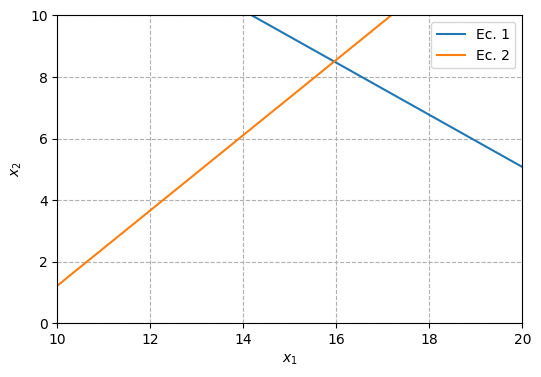

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))

x1 = np.linspace(10, 20, 50)
ax.plot(x1, (286-11*x1)/ 13, label='Ec. 1')
ax.plot(x1, (99-11*x1)/ (-9), label='Ec. 2')
ax.set(xlabel=r'$x_1$', ylabel=r'$x_2$',
       xlim=(10, 20), ylim=(0,10))
ax.legend()
ax.grid(ls='--')
plt.show()

Como se ve arriba, la estimación de la solución determinada por método gráfico es aproximadamente:  $x_1 \approx 16, x_2 \approx 8.5$.

**Solución corvergente**

El sistema se escribe de tal forma que sea dominante en la diagonal principal, y que se satisfaga el criterio de Scarborough:

$$\begin{bmatrix}
11 & -9 \\
11 & 13 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\
\end{bmatrix}
=\begin{bmatrix}99 \\ 286 \\\end{bmatrix}
$$

Ecuaciones para estimaciones:

$$x_1 = \frac{99 + 9 x_2}{11}$$
$$x_2 = \frac{286 - 11 x_1}{13}$$

In [4]:
A = np.array([[11., -9.],
             [11., 13.]]
            )
b = np.array([99., 286.])
x0 = np.zeros_like(b)

x,n = gaussSeidel(A, b, x0, relax=1.0, tol=None, niter=2)
print(x, n)

[20.76923077  4.4260355 ] 2


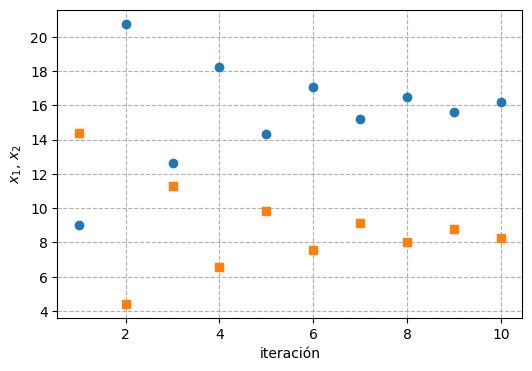

Solución tras 10 iteraciones:
x1 =   16.208620
x2 =    8.285014


In [5]:
A = np.array([[11., -9.],
             [11., 13.]]
            )
b = np.array([99., 286.])
x0 = np.zeros_like(b)

fig, ax = plt.subplots(figsize=(6,4))

for niter in range(1,11):
  x, n = gaussSeidel(A, b, x0, relax=1.0, tol=None, niter=1)
  ax.plot(niter, x[0], ls='', marker='o', color='C0')
  ax.plot(niter, x[1], ls='', marker='s', color='C1')

ax.set(xlabel="iteración", ylabel=r"$x_1,\,x_2$")
ax.grid(ls="--")
plt.show()

print(f"Solución tras {niter} iteraciones:")
print(f"x1 = {x[0]:11.6f}")
print(f"x2 = {x[1]:11.6f}")

**Solución divergente:**

El sistema está escrito de tal forma que no es dominante en la diagonal principal, y el criterio de Scarborough no se satisface:

$$\begin{bmatrix}
11 & 13 \\
11 & -9 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\
\end{bmatrix}
=\begin{bmatrix}286 \\ 99 \\\end{bmatrix}
$$

Ecuaciones para estimaciones:

$$x_1 = \frac{286 - 13 x_2}{11}$$
$$x_2 = \frac{99 - 11 x_1}{-9}$$

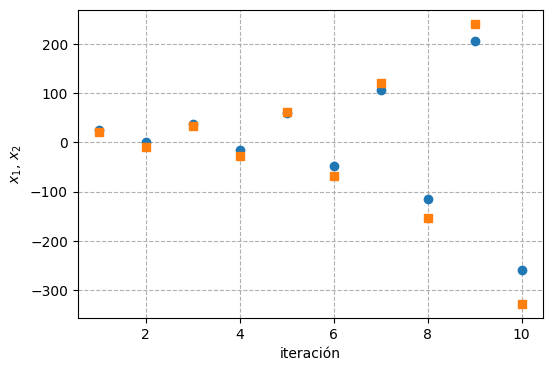

Solución tras 10 iteraciones:
x1 = -259.010304
x2 = -327.568149


In [6]:
A = np.array([[11., 13.],
              [11., -9.]]
            )
b = np.array([286., 99.])
x0 = np.zeros_like(b)

fig, ax = plt.subplots(figsize=(6,4))

for niter in range(1,11):
  x, n = gaussSeidel(A, b, x0, relax=1.0, tol=None, niter=1)
  ax.plot(niter, x[0], ls='', marker='o', color='C0')
  ax.plot(niter, x[1], ls='', marker='s', color='C1')
ax.set(xlabel="iteración", ylabel=r"$x_1,\,x_2$")
ax.grid(ls="--")
plt.show()

print(f"Solución tras {niter} iteraciones:")
print(f"x1 = {x[0]:11.6f}")
print(f"x2 = {x[1]:11.6f}")

#### 2.2.2.2 Ecuaciones no-lineales

Sistema de ecuaciones:

$$y = x^3 + 2 x^2 - 1$$

$$y = -x^2 + 1$$

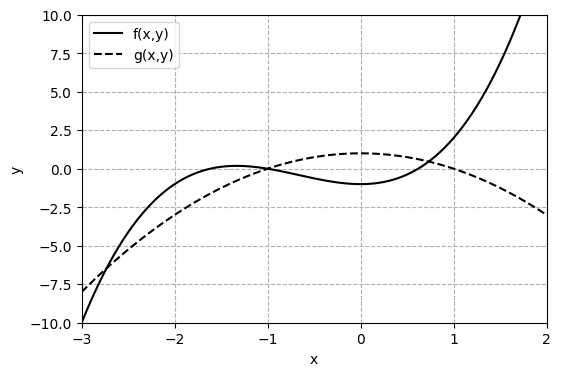

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))

x = np.linspace(-3, 2, 101)
ax.plot(x, (x)**3+2*(x)**2 -1, label='f(x,y)', color='k', ls='-')
ax.plot(x, -(x)**2 + 1, label='g(x,y)', color='k', ls='--')
ax.set(xlim=(-3, 2), ylim=(-10,10), xlabel='x', ylabel='y')
ax.grid(ls="--")
ax.legend()
plt.show()

Como se ve arriba, la estimación de la solución determinada por método gráfico nos muestra tres pares de raíces, que son aproximadamente: 

<center>

| x | y |
|---|---|
| -2.8 | -6 |
| -1 | 0 |
| 0.7 | 0.5 |

</center>

**Escritura del sistema en forma linealizada:**


El sistema se reescribe de tal forma que las incognitas estén del lado izquierdo y las constantes de lado izquierdo de la ecuación:

$$x^3 + 2x^2 - y = 1$$
$$x^2 + y = 1$$

Posteriormente, se debe de dar un tratamiento de linealización a los términos no lineales:

$$(x^2 + 2x)^* x - y = 1$$
$$(x)^* x + y = 1$$

donde el asterisco indica que para la evaluación de los coeficientes se utilizan los valores conocidos de la iteración previa.

De esta forma el sistema se puede escribir de forma matricial:

$$
\begin{bmatrix}
(x^2 + 2x)^* & -1 \\
(x)^* & 1 \\
\end{bmatrix}
\begin{bmatrix}
x \\ y \\
\end{bmatrix}
= \begin{bmatrix} 1 \\ 1 \\ \end{bmatrix}
$$

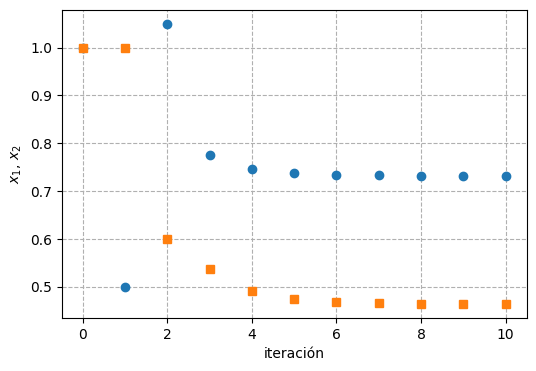

x1 =    0.732084
x2 =    0.464168


In [14]:
x0, y0 = 1, 1

A = np.array([[(x0**2 + 2*x0), -1.], [x0, 1]])
b = np.array([1, 1])
x0 = np.array([x0, y0])

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(0, x0[0], ls='', marker='o', color='C0')
ax.plot(0, x0[1], ls='', marker='s', color='C1')

for niter in range(1,11):
  x, n = gaussSeidel(A, b, x0, relax=0.5, tol=None, niter=1)
  ax.plot(niter, x[0], ls='', marker='o', color='C0')
  ax.plot(niter, x[1], ls='', marker='s', color='C1')

  x0, y0 = x
  A = np.array([[(x0**2 + 2*x0), -1.], [x0, 1]])
  x0 = np.array([x0, y0])


ax.set(xlabel="iteración", ylabel=r"$x_1,\,x_2$")
ax.grid(ls="--")
plt.show()

print(f"x1 = {x[0]:11.6f}")
print(f"x2 = {x[1]:11.6f}")

Este ejemplo se muestra para ilustrar que el tratamiento de ecuaciones no-lineales no es trivial, y que los métodos son sensibles a las condiciones iniciales y los parámetros de relajación.

**Alternativas recomendadas para la linealización:**

Una práctica recomendada para linealización de términos no-lineales es utilizar aproximaciones mediante series de Taylor truncadas:

$$f(x) = f(x^*) + f^{\prime}(x^*) (x - x^*)$$

$$f(x,y) = f(x^*,y^*) + f_{x^*}^{\prime} (x-x^*) + f_{y^*}^{\prime} (y-y^*)$$

$$\vdots$$

<details>
<summary><b>Reescritura del sistema de ecuaciones linealizado</b></summary>

<div class="class alert-info">

Para el sistema planteado arriba se escriben las funciones y sus primeras derivadas:

<center>

| $$\mathbf{f(x,y)}$$ | $$\mathbf{f_x^{\prime}}$$ | $$\mathbf{f_y^{\prime}}$$ |
|-----------|------------|-----------|
|$$f_1(x,y) = x^3 + 2x^2 - y - 1$$ | $$f_{1,x}^{\prime} = 3x^2 + 4x$$ | $$f_{1,y}^{\prime} = -1$$|
|$$f_2(x,y)=x^2 + y -1$$ | $$f_{2,x}^{\prime} = 2x$$ | $$f_{2,y}^{\prime}=1$$|

</center>

Aproximación de las funciones mediante series de Taylor truncadas:

$$f_1(x,y) = \underbrace{x^{*3} + 2x^{*2} - y^{*} - 1}_{f(x^*,y^*)} + \underbrace{\left(3x^{*2} + 4x^{*}\right)}_{f_{x^*}^{\prime}} \left(x-x^{*}\right) + \underbrace{(-1)}_{f_{y^*}^{\prime}} \left(y - y^{*}\right)$$

$$f_2(x,y) = \underbrace{x^{*2}+ y^{*} - 1}_{f(x^*,y^*)} + \underbrace{\left(2x^*\right)}_{f_{x^*}^{\prime}} \left(x-x^{*}\right) + \underbrace{(1)}_{f_{y^*}^{\prime}} \left(y - y^{*}\right)$$

Tomando en cuenta que $f_1(x,y)=f_2(x,y)=0$, y agrupando términos se obtiene:

$$\left(3x^{*2}+4x^{*}\right)x - y = 1 + 2x^{*3} + 2x^{*2}$$

$$\left(2x^{*}\right)x + y = 1 + x^{*2}$$

</div>

</details>

Para el sistema planteado arriba, el sistema linealizado escrito en forma matricial es:

$$
\begin{bmatrix}
\left(3x^{*2}+4x^{*}\right) & -1 \\
\left(2x^{*}\right) & 1 \\
\end{bmatrix}
\begin{bmatrix}
x \\ y \\
\end{bmatrix}
= \begin{bmatrix} 1 + 2x^{*3} + 2x^{*2} \\ 1 + x^{*2} \\ \end{bmatrix}
$$

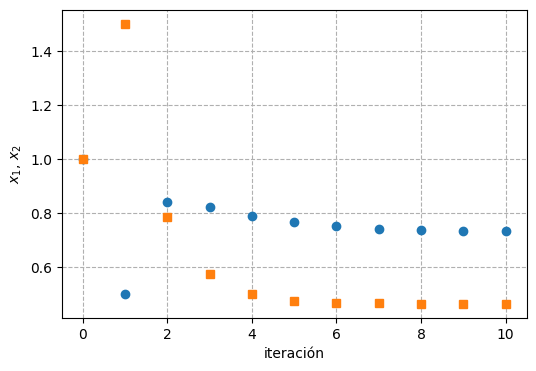

x1 =    0.733378
x2 =    0.464145


In [13]:
x0, y0 = 1, 1

A = np.array([[(3*x0**2 + 4*x0), -1.], [2*x0, 1]])
b = np.array([1+2*x0**3+2*x0**2, 1+x0**2])
x0 = np.array([x0, y0])

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(0, x0[0], ls='', marker='o', color='C0')
ax.plot(0, x0[1], ls='', marker='s', color='C1')

for niter in range(1,11):
  x, n = gaussSeidel(A, b, x0, relax=0.5, tol=None, niter=1)
  ax.plot(niter, x[0], ls='', marker='o', color='C0')
  ax.plot(niter, x[1], ls='', marker='s', color='C1')

  x0, y0 = x
  A = np.array([[(3*x0**2 + 4*x0), -1.], [2*x0, 1]])
  b = np.array([1+2*x0**3+2*x0**2, 1+x0**2])
  x0 = np.array([x0, y0])


ax.set(xlabel="iteración", ylabel=r"$x_1,\,x_2$")
ax.grid(ls="--")
plt.show()

print(f"x1 = {x[0]:11.6f}")
print(f"x2 = {x[1]:11.6f}")

### 2.2.3 Resolución de sistemas no lineales con la librería de optimización de `scipy`.

In [10]:
help(fsolve)

Help on function fsolve in module scipy.optimize._minpack_py:

fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
    Find the roots of a function.
    
    Return the roots of the (non-linear) equations defined by
    ``func(x) = 0`` given a starting estimate.
    
    Parameters
    ----------
    func : callable ``f(x, *args)``
        A function that takes at least one (possibly vector) argument,
        and returns a value of the same length.
    x0 : ndarray
        The starting estimate for the roots of ``func(x) = 0``.
    args : tuple, optional
        Any extra arguments to `func`.
    fprime : callable ``f(x, *args)``, optional
        A function to compute the Jacobian of `func` with derivatives
        across the rows. By default, the Jacobian will be estimated.
    full_output : bool, optional
        If True, return optional outputs.
    col_deriv : bool, optional
        Specify w

In [11]:
def func(X):
    x, y = X # unpacking
    f = [x**3 + 2*x**2 - y -1,
         -x**2 - y + 1]
    return f

x = [-3, -1, 1]
y = [-5, 0, 1]

sols = []
for x0, y0 in zip(x, y):
    sol = fsolve(func, x0=(x0, y0))
    sols.append(sol)
    print(sol)

[-2.73205081 -6.46410162]
[-1.  0.]
[0.73205081 0.46410162]


Al igual que el método de Gauss-Seidel, los métodos implementados en la función `fsolve` son sensibles al valor inicial utilizado.

/tmp/ipykernel_9687/1141382928.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  sol = fsolve(func, x0=[x_, y_])


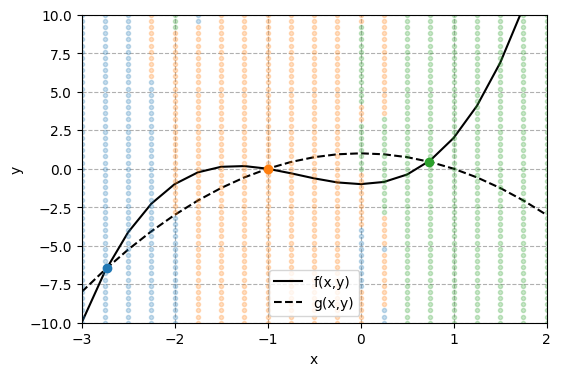

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))

x = np.linspace(-3, 2, 21)
y = np.linspace(-10, 10, 51)
ax.plot(x, (x)**3+2*(x)**2 -1, label='f(x,y)', color='k', ls='-')
ax.plot(x, -(x)**2 + 1, label='g(x,y)', color='k', ls='--')
ax.set(xlim=(-3, 2), ylim=(-10, 10), xlabel='x', ylabel='y')
ax.grid(ls="--")
ax.legend()

colors = ['C0', 'C1', 'C2']

# three roots
for idx, s in enumerate(sols):
    ax.plot(s[0], s[1], marker='o', color=colors[idx])

# Study initial value
for x_ in x:
    for y_ in y:
        sol = fsolve(func, x0=[x_, y_])
        idx = (abs(sols - sol)**2).sum(axis=1).argmin()
        ax.plot(x_, y_, marker='.', color=colors[idx], alpha=0.25)        



plt.show()